<a href="https://colab.research.google.com/github/aruaru0/pytorch-tests/blob/main/faisnet%2Bfaiss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
!pip install facenet_pytorch
!pip install faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 33.3 MB/s eta 0:00:00


In [90]:
from facenet_pytorch import MTCNN, InceptionResnetV1
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import faiss

In [91]:
# 顔検出のAI
# image_size: 顔を検出して切り取るサイズ margin: 顔まわりの余白
mtcnn = MTCNN(image_size=160, margin=10)
resnet = InceptionResnetV1(pretrained='vggface2').eval()

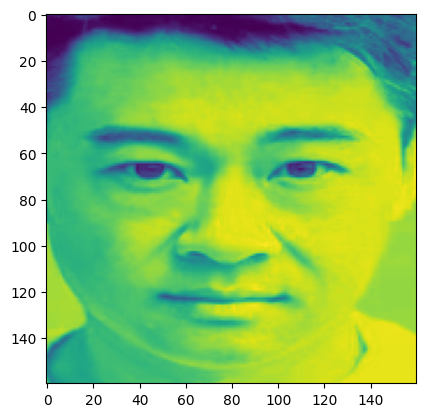

In [92]:
img = Image.open("man1.jpg")
img = mtcnn(img)
embedding = resnet(img.unsqueeze(0))[0].cpu().detach().numpy()
plt.imshow(img[0])

In [99]:
import numpy as np
embedding_norm = np.linalg.norm(embedding)
print(embedding_norm)

0.99999994


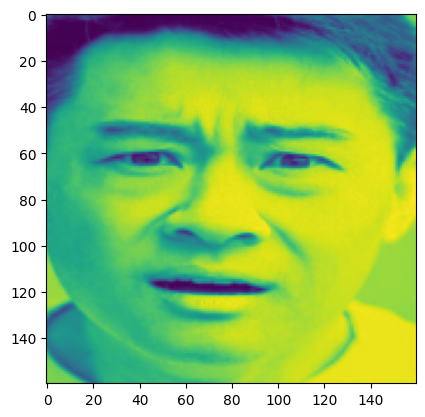

In [100]:
img2 = Image.open("man1-2.jpg")
img2 = mtcnn(img2)
embedding2 = resnet(img2.unsqueeze(0))[0].cpu().detach().numpy()
plt.imshow(img2[0])

In [101]:
import numpy as np
embedding_norm = np.linalg.norm(embedding2)
print(embedding_norm)

0.9999999


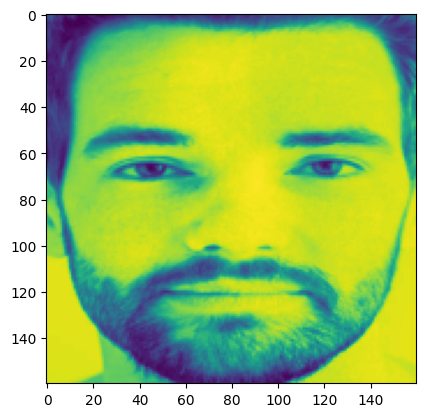

In [102]:
img3 = Image.open("man2.jpg")
img3 = mtcnn(img3)
embedding3 = resnet(img3.unsqueeze(0))[0].cpu().detach().numpy()
plt.imshow(img3[0])

In [103]:
import numpy as np
embedding_norm = np.linalg.norm(embedding3)
print(embedding_norm)

0.99999994


In [32]:
def cos_similarity(p1, p2):
    return np.dot(p1, p2) / (np.linalg.norm(p1) * np.linalg.norm(p2))

cos_similarity(embedding, embedding2)

0.9055165

In [34]:
cos_similarity(embedding, embedding3)

-0.15855196

# 顔認証テスト

In [ ]:
!pip install facenet_pytorch
!pip install faiss-cpu

In [38]:
from facenet_pytorch import MTCNN, InceptionResnetV1
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import faiss

In [68]:
dim = 512
nlist = 1
m = 32
nbits = 8

quantizer = faiss.IndexFlatIP(dim)

index = faiss.IndexIVFFlat(quantizer, dim, nlist, faiss.METRIC_INNER_PRODUCT)
# index = faiss.IndexIVFPQ(quantizer, dim, nlist, m, nbits, faiss.METRIC_INNER_PRODUCT)

In [53]:
# 顔検出のAI
# image_size: 顔を検出して切り取るサイズ margin: 顔まわりの余白
mtcnn = MTCNN(image_size=160, margin=10)
resnet = InceptionResnetV1(pretrained='vggface2').eval()

In [54]:
files = ['man1.jpg', 'man2.jpg']
labels = [0, 1]

embeddings = None
for file in files:
    img = Image.open(file)
    img = mtcnn(img)
    embedding = resnet(img.unsqueeze(0)).cpu().detach().numpy()
    if embeddings is None:
        embeddings = embedding
    else:
        embeddings = np.concatenate((embeddings, embedding), axis=0)

In [69]:
index.train(embeddings)
index.add_with_ids(embeddings, np.array(labels))

In [89]:
img = Image.open("man1-2.jpg")
img = mtcnn(img)
embedding = resnet(img.unsqueeze(0)).cpu().detach().numpy()
D, I = index.search(embedding, 2)

for d, i in zip(D[0], I[0]):
    print("distance = ", d, "index = ", i)

distance =  0.9055163 index =  0
distance =  -0.108220264 index =  1
